In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df =pd.read_csv("automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2> Heatmap</h2>

<h2> Multiple Linear Regression and Polynomial Regression. </h2>

<b> Multiple Linear Regression</b>

In [91]:
from sklearn.linear_model import LinearRegression

In [93]:
lm = LinearRegression()
lm

LinearRegression()

In [95]:
X = df[['highway-mpg']]
Y = df['price']

In [97]:
lm.fit(X,Y)

LinearRegression()

In [99]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [101]:
lm.intercept_

38423.3058581574

In [103]:
lm.coef_

array([-821.73337832])

<b>The Final Estimated  Simple Linear Model</b>

<b>price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

In [107]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [109]:
lm.fit(Z, df['price'])

LinearRegression()

In [111]:
lm.intercept_

-15806.624626329234

In [113]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [114]:
# write the multiple linear Regression model

In [117]:
# Let us make prediction
Y_hat = lm.predict(Z)

C:\Users\MICHAEL\AppData\Local\Temp\ipykernel_2580\3726067648.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\MICHAEL\AppData\Local\Temp\ipykernel_2580\3726067648.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

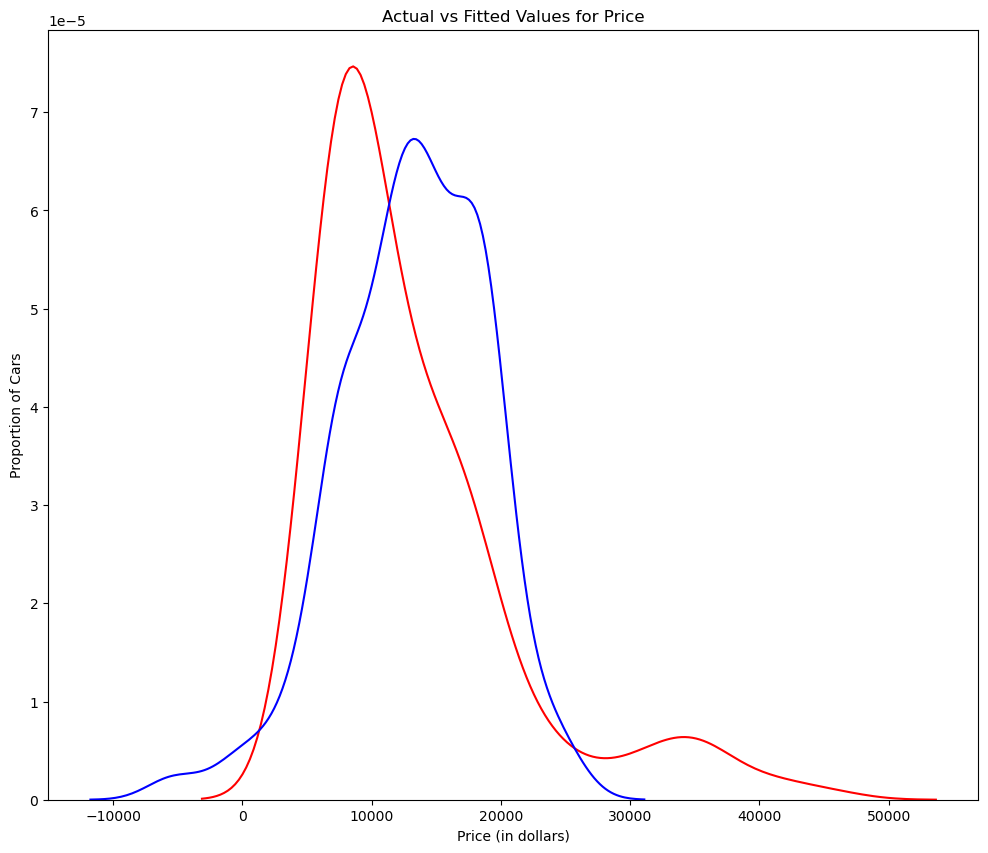

In [121]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2> Polynomial Regression</h2>

In [123]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

(0.0, 48177.3300489765)

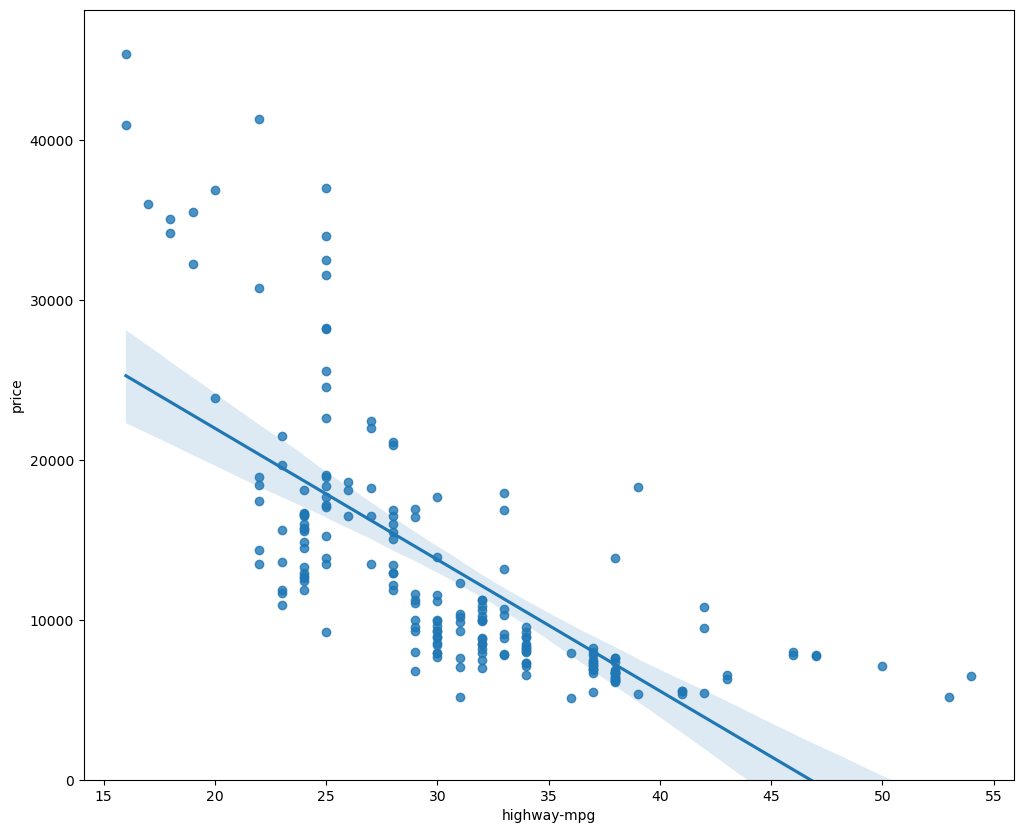

In [125]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [126]:
x = df['highway-mpg']
y = df['price']

In [129]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


<b> Let's plot the function</b>

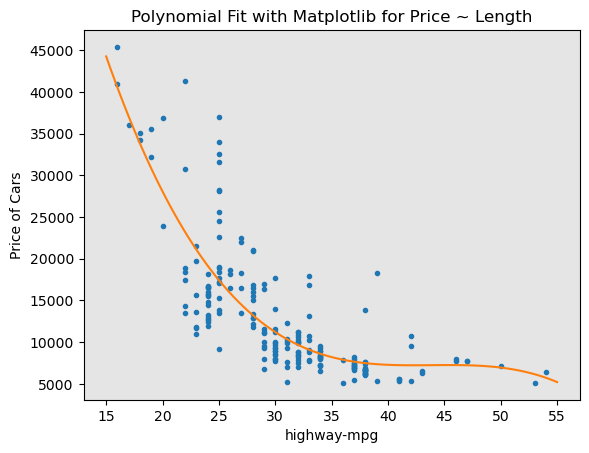

In [132]:
PlotPolly(p, x, y, 'highway-mpg')

In [134]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


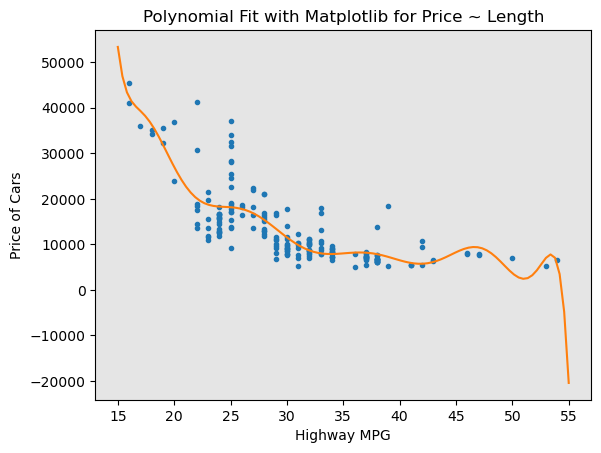

In [136]:
# Order 11
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

<h2> Measures for In-Sample Evaluation</h2>

<b>R squared</b>, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

<b> Mean Square Error</b>: The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ)

In [141]:
from sklearn.metrics import mean_squared_error

<b> Simple Linear Regression</b>

Let's calculate the R^2

In [145]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


<b> We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".</b>

In [148]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


lets import the function mean_squared_error from the module metrics

In [151]:
from sklearn.metrics import mean_squared_error

In [153]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<b> Multiple Linear Regression</b>

Let's calculate the R^2

In [61]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.9356 % of the variation of price is explained by this multiple linear regression "multi_fit".

<b> MSE</b>

In [66]:
mse = mean_squared_error(df['price'], Y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11980366.87072649


<b>2. Polynomial Fit</b>

In [69]:
from sklearn.metrics import r2_score

In [73]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [76]:
mean_squared_error(df['price'], p(x))

20474146.426361218